In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df=pd.read_csv("/content/linearRegression dataset.csv")

In [16]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [18]:
df_num_only=df.select_dtypes(exclude=['object']) # only need numerical features for linear regression

**One variable linear regression**

In [19]:
x=df_num_only['sqft_living'] # for one variable linear regression

In [20]:
y=df['price'] #y---> target variable

In [21]:
x

,sqft_living
0,1340
1,3650
2,1930
3,2000
4,1940
...,...
4595,1510
4596,1460
4597,3010
4598,2090


In [22]:
y

,price
0,3.130000e+05
1,2.384000e+06
2,3.420000e+05
3,4.200000e+05
4,5.500000e+05
...,...
4595,3.081667e+05
4596,5.343333e+05
4597,4.169042e+05
4598,2.034000e+05


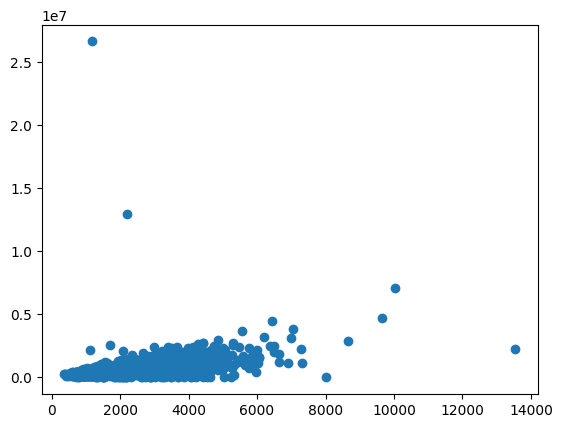

In [23]:
plt.scatter(x,y)

In [24]:
model=LinearRegression() # object creation

In [25]:
x_reshaped=x.to_numpy().reshape(-1,1) # make features 1D to 2D arry

In [26]:
x_reshaped

array([[1340],
       [3650],
       [1930],
       ...,
       [3010],
       [2090],
       [1490]])

In [27]:
model.fit(x_reshaped,y) # fearure and target fit

LinearRegression()

In [28]:
model.coef_

array([251.95013106])

In [29]:
model.intercept_

np.float64(12954.242396381567)

In [33]:
model.predict([[6000]])

array([1524655.0287518])

In [34]:
x_multiple=df_num_only.drop(['price'], axis=1) # for multiple variable linear regression

In [35]:
x_multiple_reshaped=x_multiple.to_numpy().reshape(-1,1) # make features 1D to 2D arry

In [36]:
x_multiple_reshaped

array([[3.00e+00],
       [1.50e+00],
       [1.34e+03],
       ...,
       [0.00e+00],
       [1.99e+03],
       [0.00e+00]])

In [38]:
model.fit(x_multiple, y) # feature and target fit

LinearRegression()

In [40]:
model.predict([[3, 2.5, 2000, 8000, 2, 0, 0, 4, 1500, 500, 1980, 2000]]) # Example with 12 features, replace with actual values

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([566615.90549394])

In [41]:
model.coef_

array([-5.80418404e+04,  5.71994888e+04,  1.64411635e+02, -6.91247693e-01,
        3.98082029e+04,  3.55343580e+05,  4.56986738e+04,  3.18436743e+04,
        9.70378291e+01,  6.73738056e+01, -2.37821015e+03,  6.57271554e+00])

In [42]:
model.intercept_

np.float64(4583925.323880289)